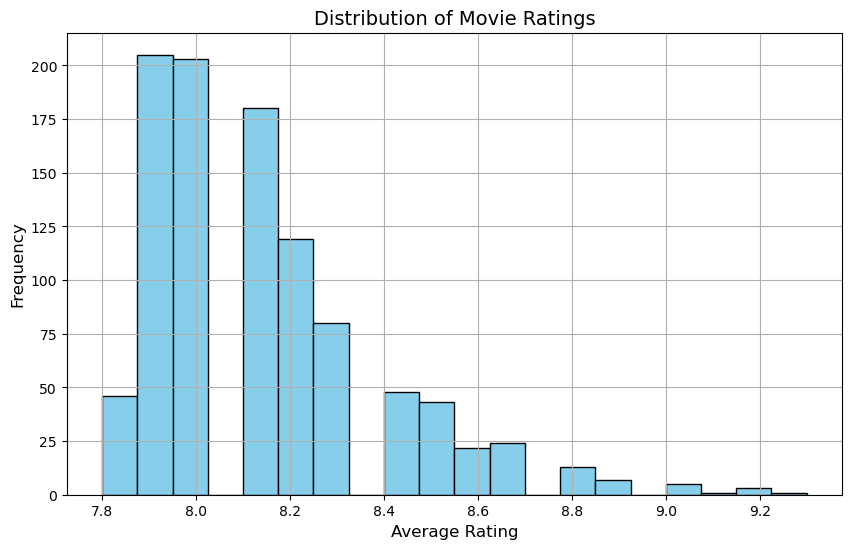

             avg_rating  total_votes  num_movies
genres                                          
News           8.200000        29096           1
War            8.184746     12692397          59
Animation      8.174576     22751212          59
Western        8.157143      4633962          14
History        8.150980      8387334          51
Adventure      8.147297     84358382         148
Action         8.144330     85624137         194
Mystery        8.143038     29235462          79
Family         8.141860      9677067          43
Comedy         8.141589     48954088         214
Documentary    8.139535      2604830          86
Crime          8.138710     62488518         217
Biography      8.133036     27537014         112
Musical        8.130769       936214          13
Drama          8.128769    183471900         723
Sci-Fi         8.124000     38336471          50
Sport          8.124000      3556928          25
Music          8.123529      5131009          34
Fantasy        8.112

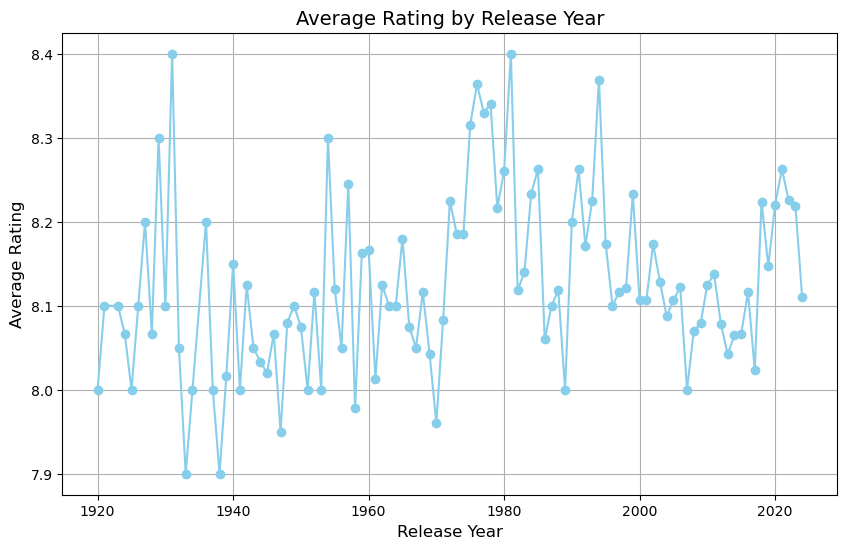


Top Rated Movie:
id                              tt0111161
title            The Shawshank Redemption
genres                              Drama
averageRating                         9.3
numVotes                          2954275
releaseYear                          1994
Name: 0, dtype: object


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/fanglingwu/Desktop/data.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Distribution of Ratings
plt.figure(figsize=(10, 6))
plt.hist(data['averageRating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Grouping data by Genre and Release Year for analysis
# Split genres into multiple rows for movies that belong to more than one genre
data_exploded = data.copy()
data_exploded['genres'] = data_exploded['genres'].str.split(', ')
data_exploded = data_exploded.explode('genres')

# Average rating and number of votes by genre
genre_analysis = data_exploded.groupby('genres').agg(
    avg_rating=('averageRating', 'mean'),
    total_votes=('numVotes', 'sum'),
    num_movies=('id', 'count')
).sort_values(by='avg_rating', ascending=False)

# Display genre analysis
print(genre_analysis)

# Average rating by release year
release_year_analysis = data.groupby('releaseYear').agg(
    avg_rating=('averageRating', 'mean'),
    num_movies=('id', 'count')
).sort_values(by='releaseYear')

# Plotting results for release year analysis
plt.figure(figsize=(10, 6))
plt.plot(release_year_analysis.index, release_year_analysis['avg_rating'], marker='o', color='skyblue')
plt.title('Average Rating by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.show()

# Displaying top-rated movie
top_rated_movie = data.loc[data['averageRating'].idxmax()]
print("\nTop Rated Movie:")
print(top_rated_movie)